In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

#### 1. Loading and Preprocessing 

In [79]:
# Loading dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [13]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [15]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [17]:
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [72]:
# Spliting dataset
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2. Regression Algorithm Implementation

In [60]:
# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

##### * Explanations and Suitability
##### 1. Linear Regression: Fits a straight line; works well for linear data but may not capture complex patterns.
##### 2. Decision Tree Regressor: Splits data into decision nodes; good for non-linear relationships but may overfit.
#####  3. Random Forest Regressor: Uses multiple trees; reduces overfitting and works well for structured data.
#####  4. Gradient Boosting Regressor: Boosts weak models sequentially; highly accurate for structured data.
#####  5. Support Vector Regressor (SVR): Uses hyperplanes; effective for complex patterns but slow for large datasets.

#### 3. Evaluate models

In [41]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "MAE": mae, "R2": r2}
    print(f"\n{name} Results:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")


Linear Regression Results:
MSE: 0.5558915986952442
MAE: 0.5332001304956565
R2 Score: 0.575787706032451

Decision Tree Regressor Results:
MSE: 0.49019832991671514
MAE: 0.45542045058139535
R2 Score: 0.6259195884213491

Random Forest Regressor Results:
MSE: 0.255169737347244
MAE: 0.3274252027374032
R2 Score: 0.8052747336256919

Gradient Boosting Regressor Results:
MSE: 0.29399901242474274
MAE: 0.37165044848436773
R2 Score: 0.7756433164710084

Support Vector Regressor Results:
MSE: 0.3570040319338641
MAE: 0.3985990769520539
R2 Score: 0.7275628923016779


In [43]:
# Converting results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                                  MSE       MAE        R2
Linear Regression            0.555892  0.533200  0.575788
Decision Tree Regressor      0.490198  0.455420  0.625920
Random Forest Regressor      0.255170  0.327425  0.805275
Gradient Boosting Regressor  0.293999  0.371650  0.775643
Support Vector Regressor     0.357004  0.398599  0.727563


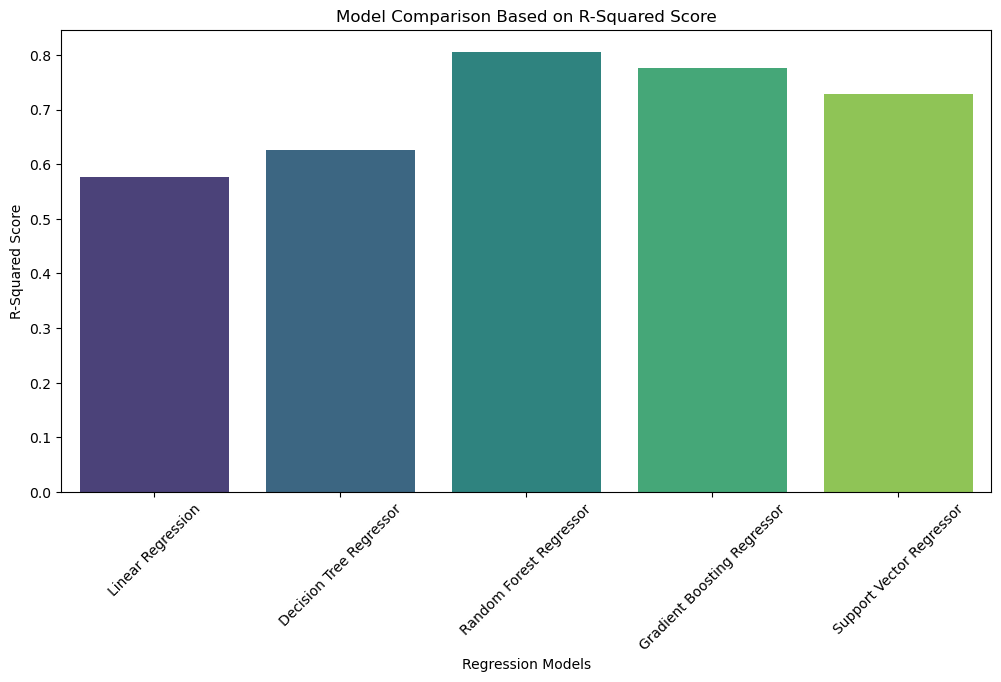

In [45]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.reset_index(), x='index', y='R2', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Regression Models")
plt.ylabel("R-Squared Score")
plt.title("Model Comparison Based on R-Squared Score")
plt.show()